### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

### 2.  Data Preparation

In [2]:
# Reading dataset
bikes_sharing_df = pd.read_csv('day.csv')

In [3]:
bikes_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Check size of the dataset
bikes_sharing_df.size

11680

In [5]:
bikes_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Check shape of the dataset
bikes_sharing_df.shape

(730, 16)

In [7]:
bikes_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
bikes_sharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [9]:
# View all columns in dataset
bikes_sharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
# null values
bikes_sharing_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [11]:
# Check dimension of the dataset
bikes_sharing_df.ndim

2

In [12]:
# Fetch all values in the dataset
bikes_sharing_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

### 3. Data Cleaning

In [13]:
# Add a new column called days_old to know how many days is old from 01-01-2018
bikes_sharing_df['days_old' ] = (pd.to_datetime(bikes_sharing_df['dteday'], format='%d-%m-%Y')- pd.to_datetime('01-01-2018', format='%d-%m-%Y')).dt.days

In [14]:
# Check the days_old new 
bikes_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [15]:
# Drop unnecessary columns
bikes_sharing_df.drop(['casual','registered','instant','dteday'],axis=1,inplace=True)

In [16]:
# ReCheck the dataset
bikes_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [17]:
# Check the value counts for Season
bikes_sharing_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [18]:
# Check the value counts for weathersit
bikes_sharing_df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [19]:
# Note - There is correlation between all the variables
bikes_sharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


In [20]:
# ReCheck the dataset
bikes_sharing_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

In [21]:
# check unique values
bikes_sharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

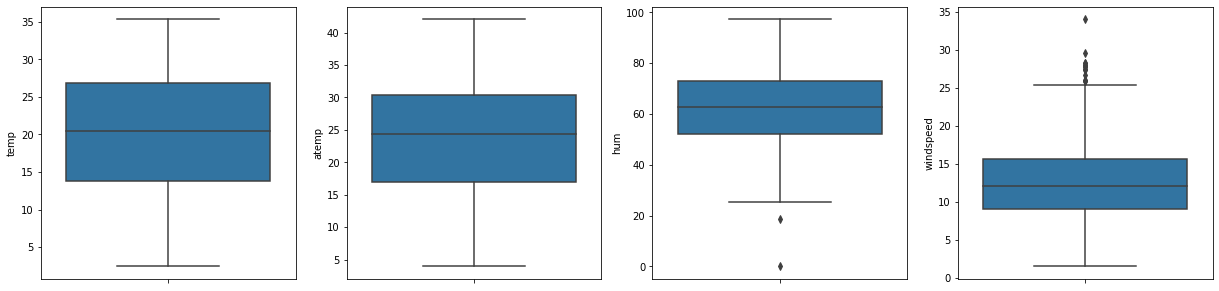

In [22]:
# check outliers
plt.figure(figsize=(21,5))
Cols=['temp','atemp','hum','windspeed']
j=1
for i in Cols:
    plt.subplot(1,4,j)
    sns.boxplot(y=i,data=bikes_sharing_df)
    j+=1

* We can analyse from these plots that there are no outliers in the data we can proceed with the existing data

### 4. Exploratory Data Analysis (EDA)

In [23]:
# As mentioned in the assignment we have to convert the weathersit, season, mnth and weekday into categorical types for better analysis
bikes_sharing_df.weathersit.replace({ 1:'good',2:'moderate',3:'bad',4:'severe'},inplace=True )
bikes_sharing_df.season.replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
bikes_sharing_df.mnth.replace({1:'jan',2:'feb',3:'march',4:'april',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'},inplace=True)
bikes_sharing_df.weekday.replace({ 0:'sun',1:'mon',2:'tue',3:'wed',4:'thurs',5:'fri',6:'sat'},inplace=True)

In [24]:
# Check data frame
bikes_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thurs,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


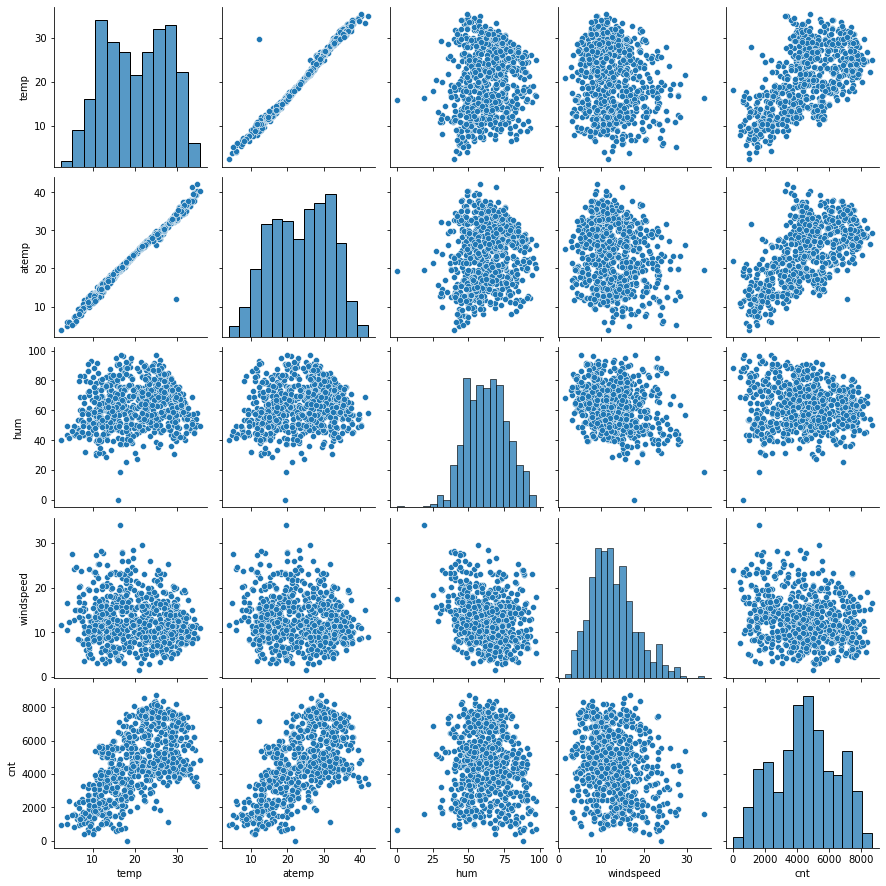

In [25]:
# Analyze via pairplots
sns.pairplot(data=bikes_sharing_df,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

Observations:
- As the temp and atemp increases, the count of bike rentals increases
- Windspeed is high the total users taking rental decreases
- As humidity increases, the users for rentals also increases (directly proportional)

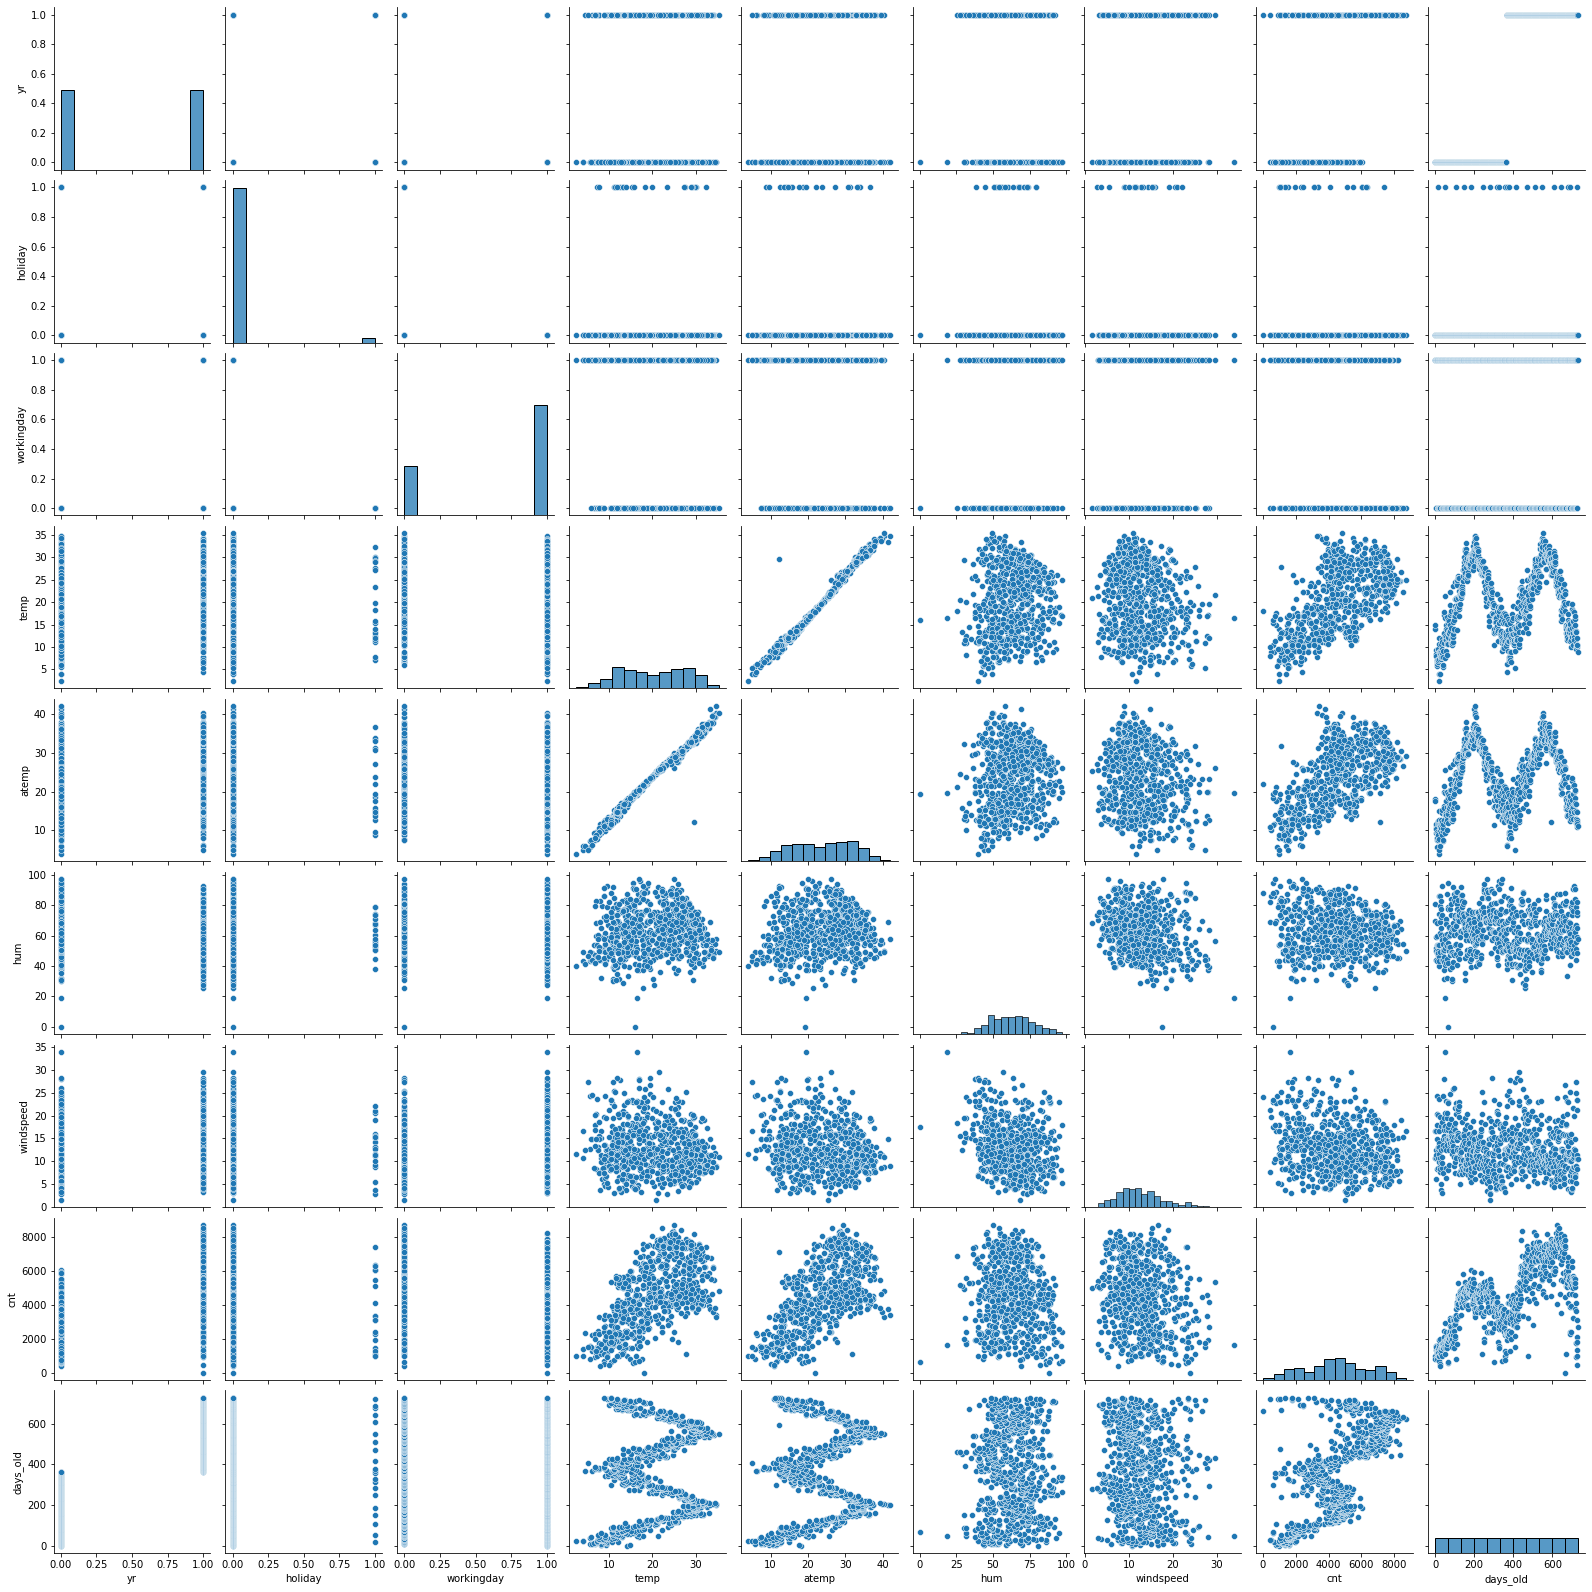

In [26]:
# Analyze via Pair plots for the entire dataset
sns.pairplot(bikes_sharing_df)
plt.show()

Observations-
- days_old vs cnt: As we have taken 2 years of data, can see the number of users increased in the 2nd year compared to 1st year.
  
- days_old vs atemp, temp : Temperature is almost same in past 2 years.

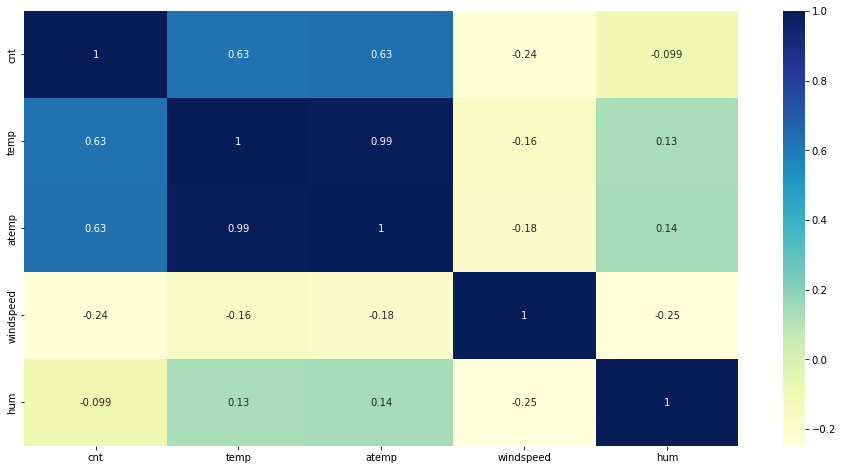

In [27]:
# Analyze via heat map 
plt.figure(figsize=(16,8))
sns.heatmap(bikes_sharing_df[['cnt','temp','atemp','windspeed','hum']].corr(),cmap='YlGnBu',annot=True)
plt.show()

Observations
- atemp and temp are correlated with customers count

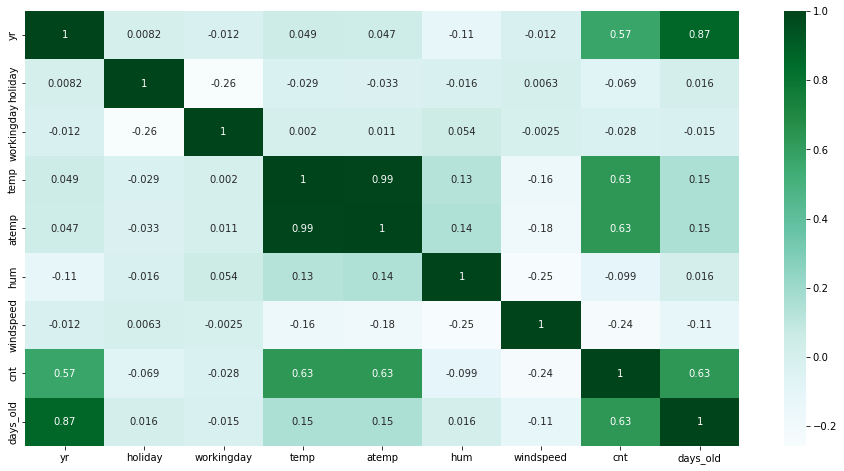

In [28]:
#plot heat map for entire dataset
plt.figure(figsize=(16,8))
sns.heatmap(bikes_sharing_df.corr(),cmap='BuGn',annot=True)
plt.show()

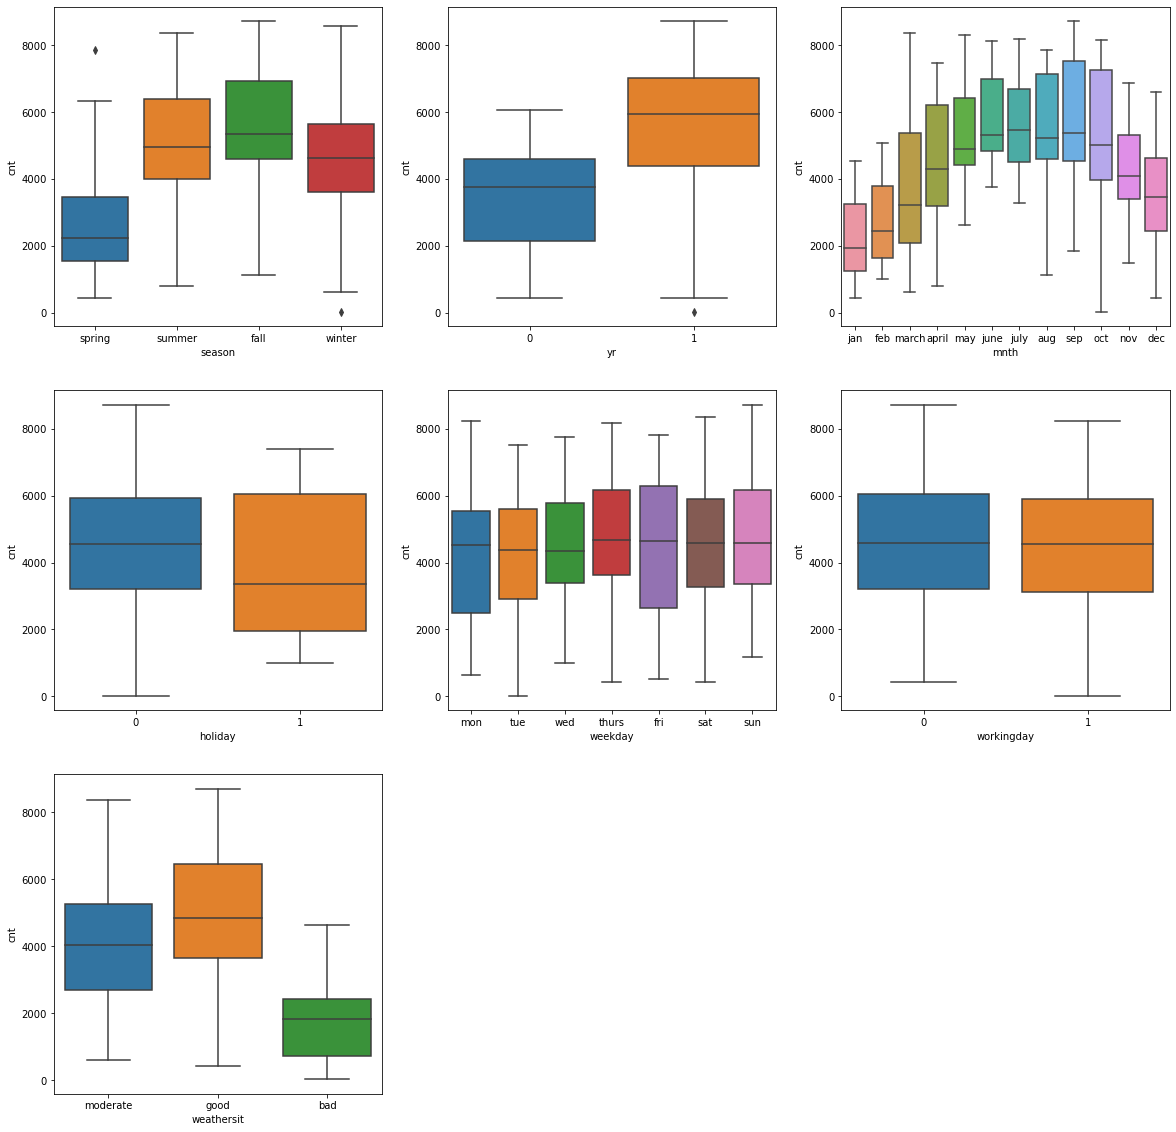

In [29]:
# Plot boxplots
list_vars = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20,20))

for j in enumerate(list_vars):
    plt.subplot(3,3,j[0]+1)
    sns.boxplot(data=bikes_sharing_df, x=j[1], y='cnt')
plt.show()

Observations:
- In summer, fall and winter the median lies between 4000 to 6000 users. Spring is having less range and the median.
- There are high range of users who rented the bikes in fall.
- 2019 to 2020 is having high count of users that rented a vehicle compared to past year.
- June, July, September and October are having high median and total number of users are also high in September and October.
- On holidays, there are more rentals booked but coming to median it is high in working days.
- On an average Thursday & Friday are having greater median compared to all other days, Friday has more range of users.
- Weather is bad at that time the users decreased and increased when it is moderate and good climate.

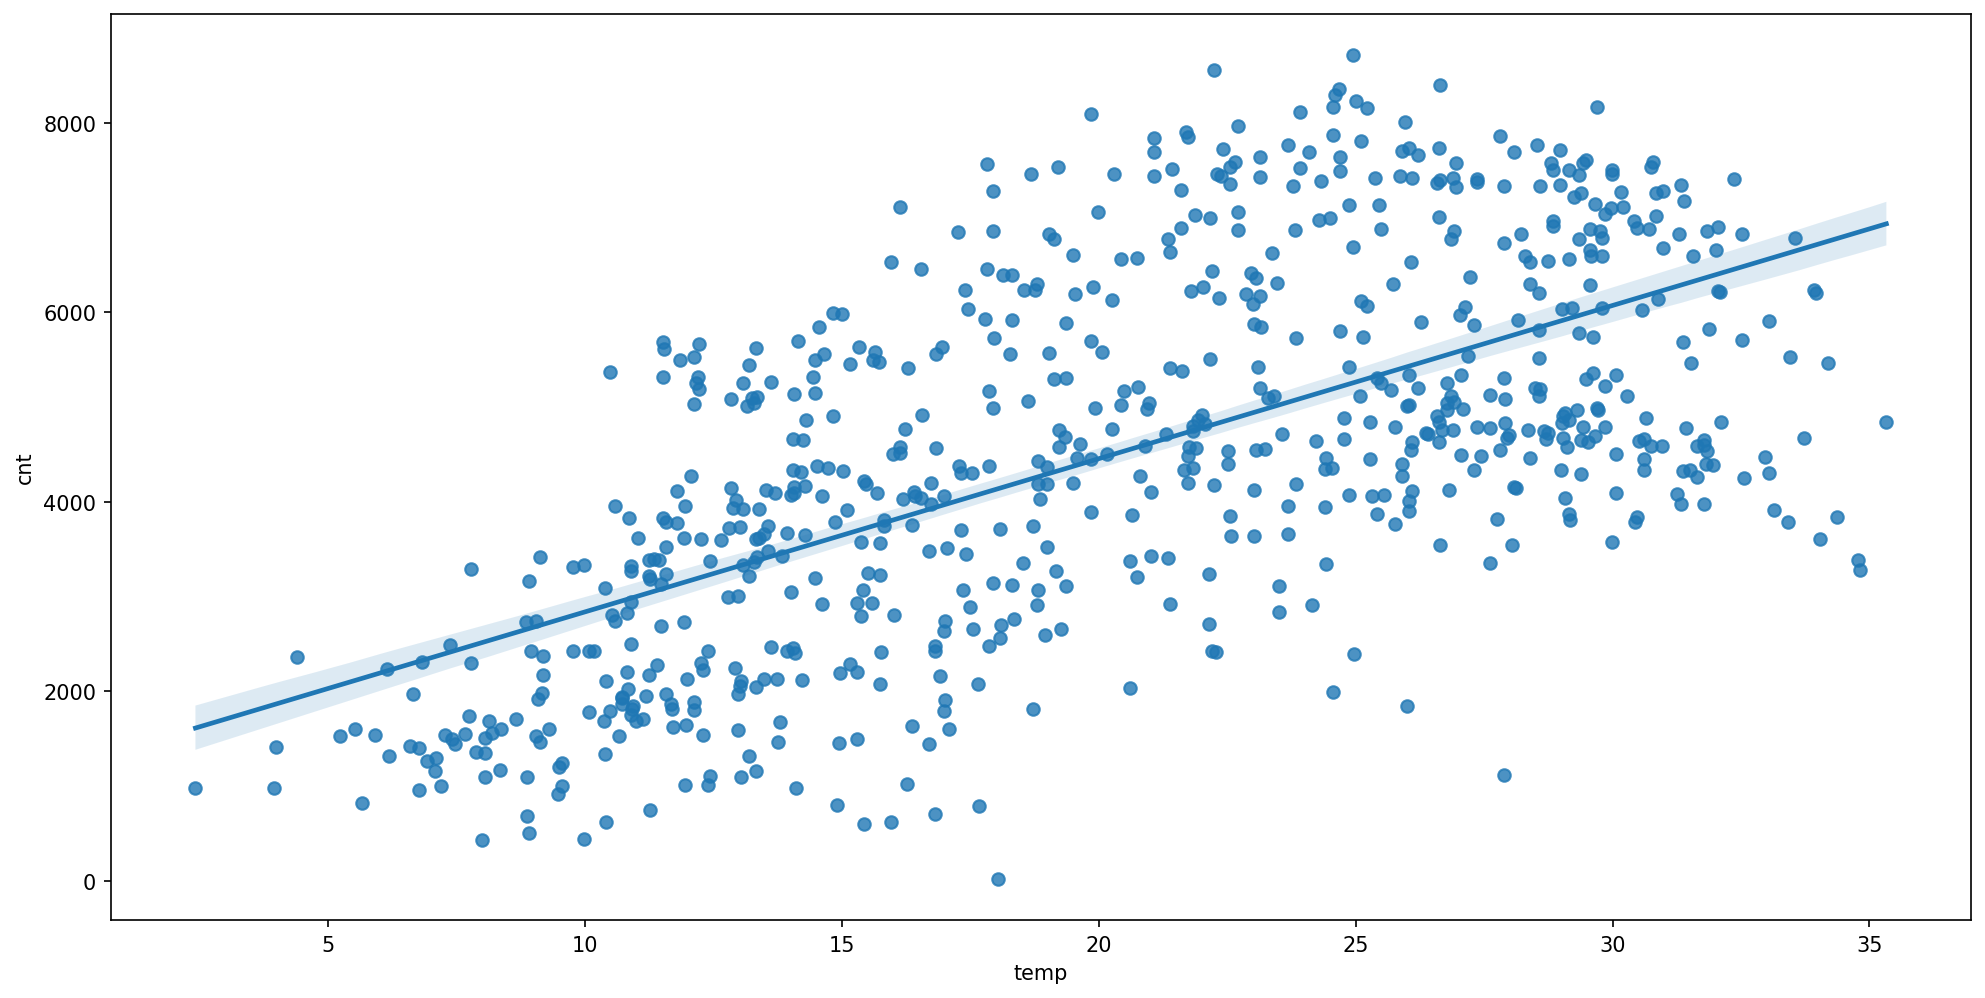

In [30]:
# Plot Regression plot for temp vs count
plt.figure(figsize=(16,8),dpi=150)
sns.regplot(data=bikes_sharing_df,y='cnt',x='temp')
plt.show()

Note- regplot is increasing as the temperature is increasing

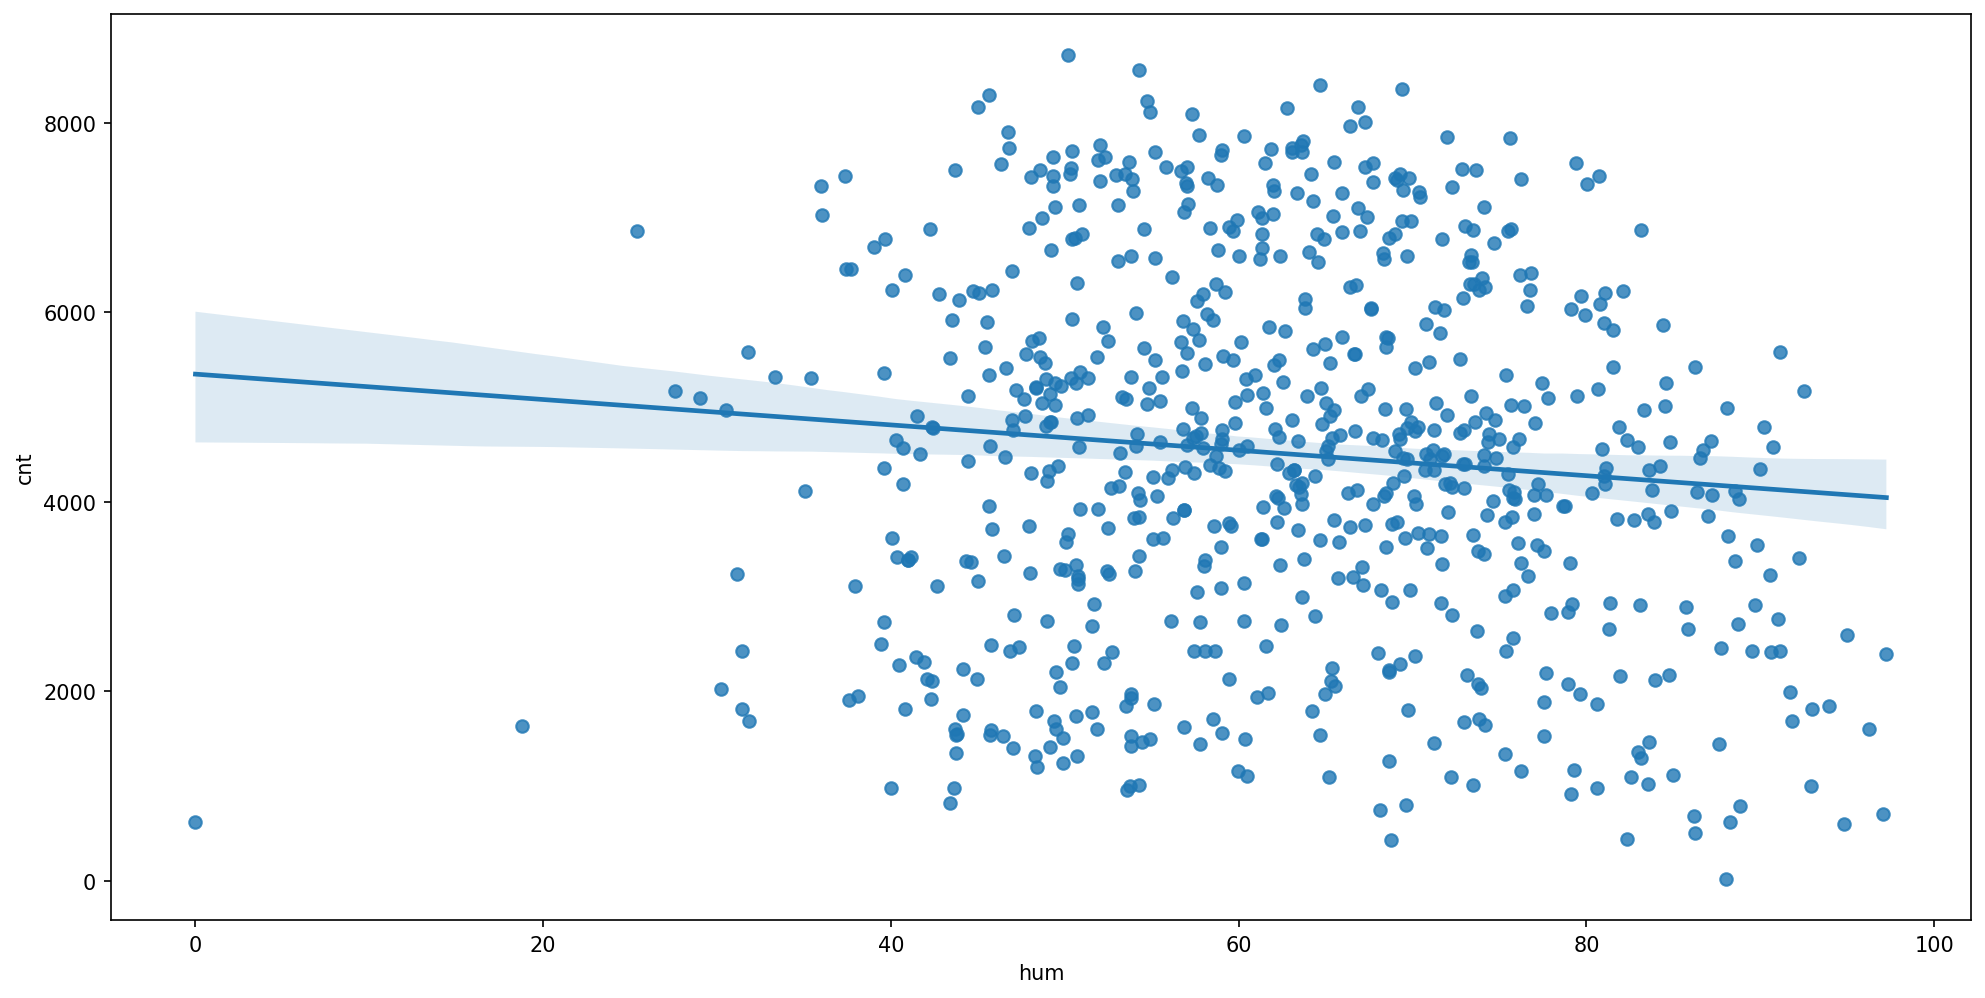

In [31]:
# regression plot for temp vs hum
plt.figure(figsize=(16,8),dpi=150)
sns.regplot(data=bikes_sharing_df,y='cnt',x='hum')
plt.show()

Note- regplot is decreasing as the humidity is increasing

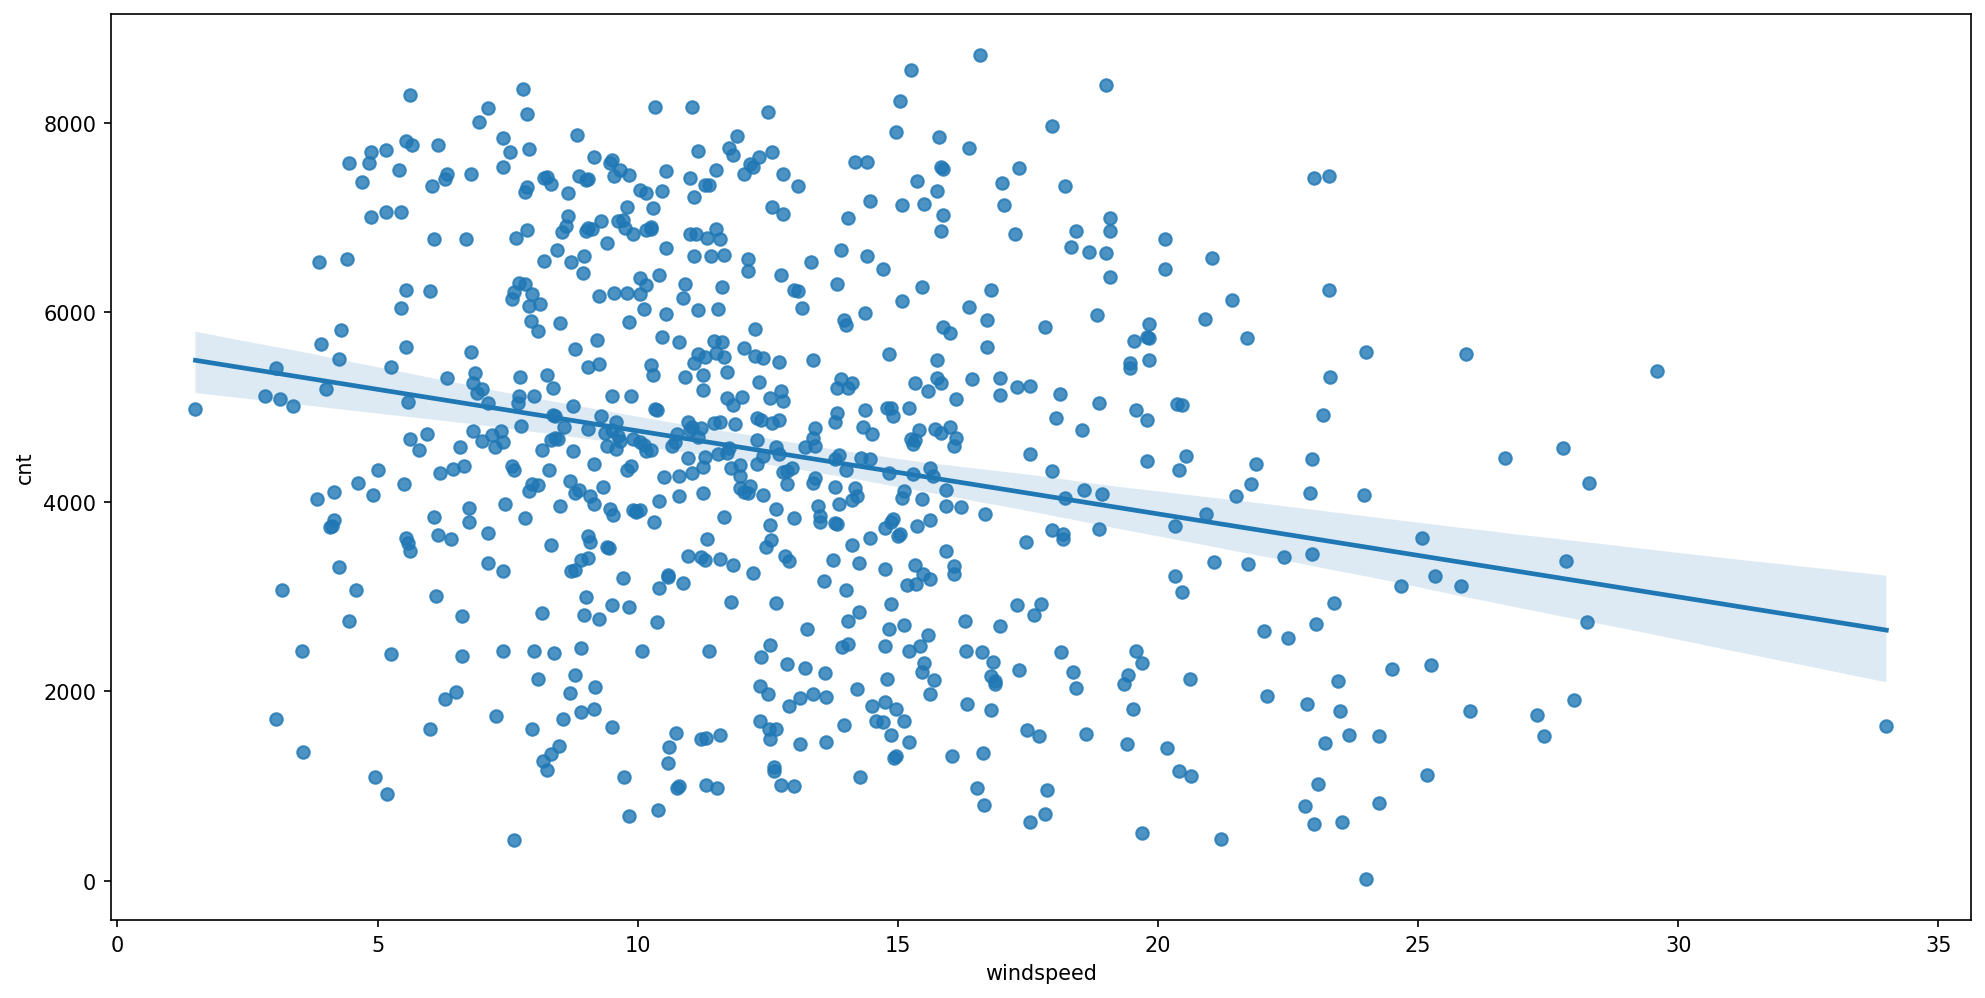

In [32]:
# Regression plot for temp vs count
plt.figure(figsize=(16,8),dpi=150)
sns.regplot(data=bikes_sharing_df,y='cnt',x='windspeed')
plt.show()

Note- regplot is decreasing as the windspeed is increasing, count is decreasing.

In [33]:
bikes_sharing_df.size

9490

In [34]:
bikes_sharing_df.shape

(730, 13)

In [35]:
bikes_sharing_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


### 5. Data Modelling

In [36]:
bikes_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thurs,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [37]:
# Create dummy variables for categorical variables
bikes_sharing_df=pd.get_dummies(data=bikes_sharing_df,columns=['season','mnth','weekday'],drop_first=True)
bikes_sharing_df=pd.get_dummies(data=bikes_sharing_df,columns=['weathersit'])

In [38]:
# Analyse the dataset after creation of dummies
bikes_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


In [39]:
# Check total columns
bikes_sharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july',
       'mnth_june', 'mnth_march', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thurs', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [40]:
# Check total size
bikes_sharing_df.shape

(730, 32)

### 6. Model Building

### Test-Train-Split

In [41]:
# Take Y as traget variable and remaining all as independent variables
X=bikes_sharing_df.drop(["cnt"],axis=1)
y=bikes_sharing_df["cnt"]

In [42]:
# Take train size : test size as 80% and 20%
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [43]:
# Print the shapes of independent variables
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


### Rescaling

In [44]:
# Apply rescaling function to numerical variables
num_vars=['temp','atemp','hum','windspeed','days_old']
scaler=MinMaxScaler()

In [45]:
# use fit_transform method to use rescaling
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [46]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Build model using Automated approach and RFE 

In [47]:
# Use linear regression fitting X_train and y_train
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
# Use Recursive feature eliminator top 15 features 
rfe=RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [49]:
# List all the columns with rankings and support
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_july', False, 12),
 ('mnth_june', False, 5),
 ('mnth_march', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 14),
 ('weekday_thurs', False, 17),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

### manual elimination method

In [50]:
# Add constant to the X_train values using stats model and building an OLS method
def buildmodel(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [51]:
# function to get all VIF values in a descending order
def getvif(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [52]:
# Columns which are supported by RFE
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_march', 'mnth_may', 'mnth_oct',
       'mnth_sep', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [53]:
# Columns which are not supported by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_july', 'mnth_june', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thurs', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [54]:
# Take 15 RFE supported columns 
X_train_Rfe = X_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_oct', 'mnth_sep', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate']]

In [55]:
X_train_Rfe.shape

(511, 15)

#### Model-1

In [56]:
# Fetch the OLS & VIF's results of allthe supported RF's columns
cols=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'days_old','season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_oct', 'mnth_sep', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate']
buildmodel(cols)
getvif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     183.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          9.94e-186
Time:                        22:53:33   Log-Likelihood:                -4127.5
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     496   BIC:                             8349.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1688.2647    

#### Model-2

In [57]:
# Fetch the OLS & VIF's results of the filtered and supported RF's columns
cols=['yr', 'holiday', 'temp', 'hum', 'windspeed','season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_oct', 'mnth_sep', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate']
buildmodel(cols)
getvif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.8
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          5.91e-186
Time:                        22:53:34   Log-Likelihood:                -4129.7
No. Observations:                 511   AIC:                             8287.
Df Residuals:                     497   BIC:                             8347.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1523.4794    

#### Model-3

In [58]:
# Fetch the OLS & VIF's results of the filtered and supported RF's columns
cols=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_oct', 'mnth_sep', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate']
buildmodel(cols)
getvif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          9.91e-184
Time:                        22:53:34   Log-Likelihood:                -4137.8
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     498   BIC:                             8357.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 891.7232    

#### Model-4

In [59]:
# Fetch the OLS & VIF's results of the filtered and supported RF's columns
cols=['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_oct', 'mnth_sep', 'weathersit_bad', 'weathersit_moderate']
buildmodel(cols)
getvif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          9.91e-184
Time:                        22:53:34   Log-Likelihood:                -4137.8
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     498   BIC:                             8357.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1919.6444    

#### Model-5

In [60]:
# Fetch the OLS & VIF's results of the filtered and supported RF's columns
cols=['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_oct', 'mnth_sep', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate']
buildmodel(cols)
getvif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.7
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.13e-180
Time:                        22:53:34   Log-Likelihood:                -4148.5
No. Observations:                 511   AIC:                             8321.
Df Residuals:                     499   BIC:                             8372.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.8683    

#### Model-6

In [61]:
# Fetch the OLS & VIF's results of the filtered and supported RF's columns
cols=['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_oct', 'mnth_sep', 'weathersit_bad', 'weathersit_moderate']
buildmodel(cols)
getvif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     212.7
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.13e-180
Time:                        22:53:34   Log-Likelihood:                -4148.5
No. Observations:                 511   AIC:                             8321.
Df Residuals:                     499   BIC:                             8372.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 959.9030    

#### Model-7

In [62]:
# Fetching the OLS & VIF's results of the filtered and supported RF's columns
cols=['yr', 'holiday', 'temp', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_oct', 'mnth_sep', 'weathersit_bad', 'weathersit_moderate']
buildmodel(cols)
getvif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.7
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.28e-178
Time:                        22:53:34   Log-Likelihood:                -4156.4
No. Observations:                 511   AIC:                             8335.
Df Residuals:                     500   BIC:                             8381.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 541.3121    

### Inference
- All the VIF values are less than 5, p values are less than 0.05 and there is very slight difference i.e. 0.003 between R squared value and Adjusted R square value.
- There is no more multicollinearity among the variables.
- Achieved 82.5% Adjusted R Squared percentage and the model is significant.

In [63]:
# Build a final model for selecting features automatically
def buildmodel_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [64]:
# Build the final model by sklearn
cols=['yr', 'holiday', 'temp', 'season_summer', 'season_winter', 'mnth_aug','mnth_oct', 'mnth_sep', 'weathersit_bad', 
      'weathersit_moderate']
lr = buildmodel_sk(X_train[cols],y_train)
print(lr.coef_,lr.intercept_)

[ 1988.36829323  -722.96606329  4771.87118296   863.17434841
  1153.99379677   360.08292071   538.5825496   1002.49789028
 -2303.90628592  -699.2507791 ] 541.3121482664187


In [65]:
# Calculate y_train_pred
y_train_pred = lr.predict(X_train[cols])

### 7. Model Evaluation

In [66]:
#Plot a graph for residuals (Residual Analysis)
def residuals_plot(actual, predicted):
    sns.distplot(actual-predicted)
    plt.title('Normal Distribution of Residuals')
    plt.xlabel('Errors')

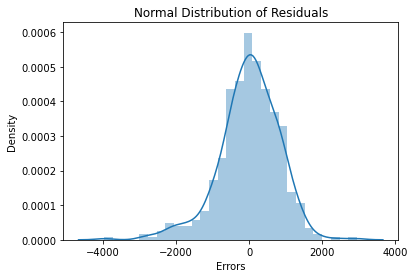

In [67]:
# Plot graph
residuals_plot(y_train, y_train_pred)

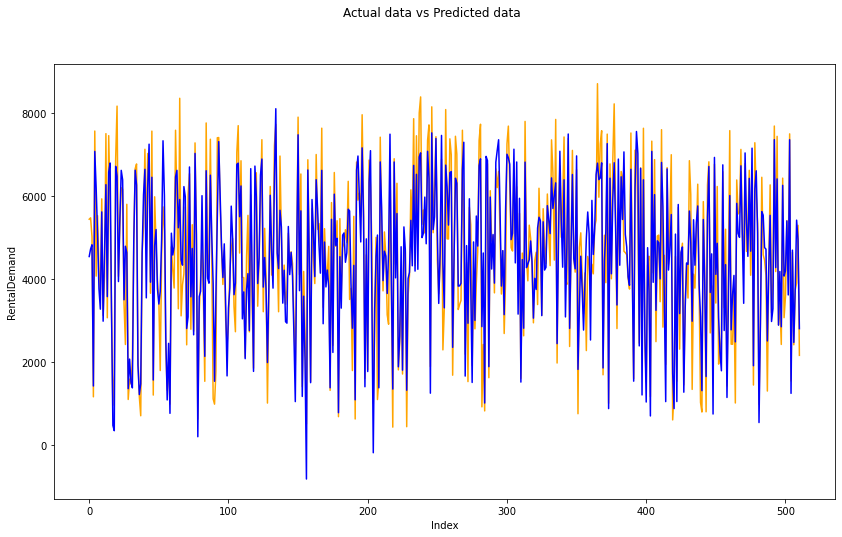

In [68]:
# Plot the graph of y_train and y_train_pred 
plt.figure(figsize=(14,8))
a = [i for i in range(0,len(X_train),1)]
plt.plot(a,y_train, color='orange')
plt.plot(a,y_train_pred, color='blue')
plt.suptitle('Actual data vs Predicted data')
plt.xlabel('Index')
plt.ylabel('RentalDemand')
plt.show()

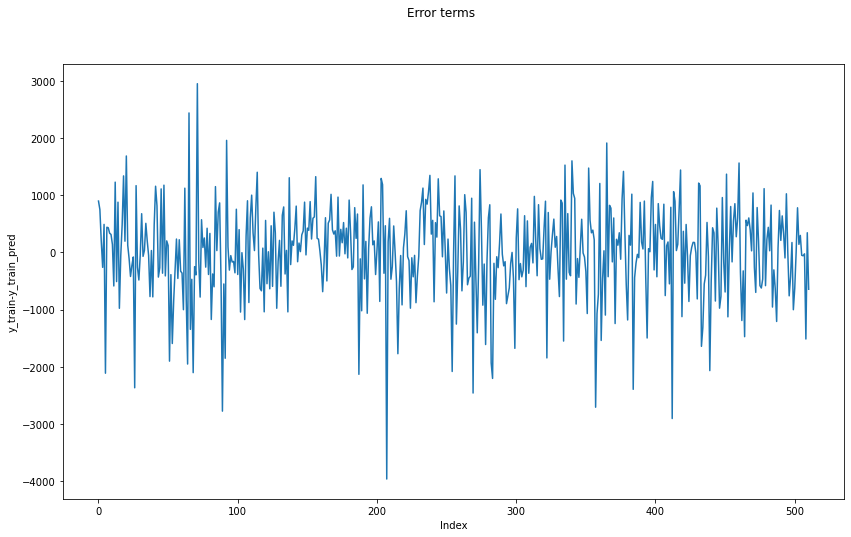

In [69]:
# Plot the graph of residuals i.e diffrence between y_train and y_train_pred 
plt.figure(figsize=(14,8))
b = [i for i in range(0,len(X_train),1)]
plt.plot(b,y_train-y_train_pred)
plt.suptitle('Error terms')
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [70]:
# Find the accuracy between the y_train and y_train_pred
r2_score(y_train,y_train_pred)

0.8186430761929693

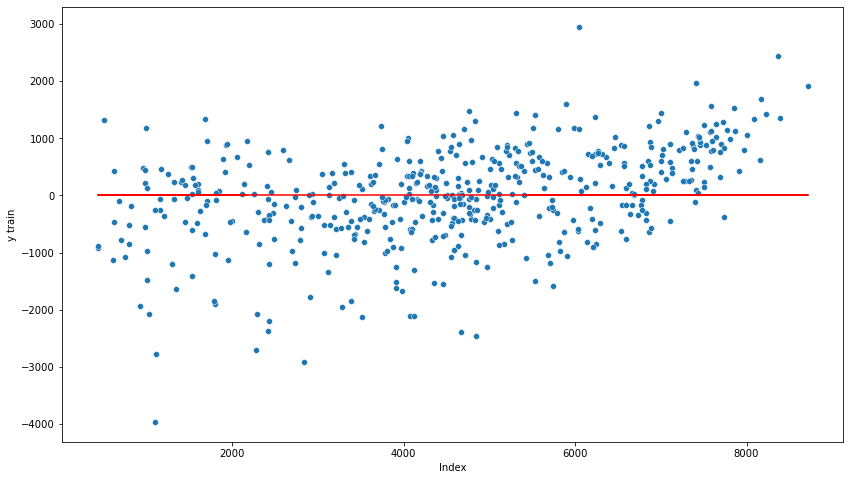

In [71]:
# Scatter plot of residuals vs y_train and follows homoscedasticity
plt.figure(figsize=(14,8))
residuals = (y_train - y_train_pred)
sns.scatterplot(y_train,residuals)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel("Index")
plt.ylabel("y train")
plt.show()

#### Predict the values for the test dataset

In [72]:
# Scaling the numerical variables in the test dataset
num_vars = ['temp','atemp','hum','windspeed','days_old']

In [73]:
# For the test the dataset we can use only transform function instead of the fit_transform to avoid overfitting
X_test[num_vars] = scaler.transform(X_test[num_vars]) 

In [74]:
# The final columns we got after 7th iteration of the model i.e. final model's parameters
cols=['yr', 'holiday', 'temp', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_oct', 'mnth_sep', 'weathersit_bad', 'weathersit_moderate']
# Predicting the values y values for the test dataset
y_test_pred = lr.predict(X_test[cols])

In [75]:
# Find the test r2 score 
r2_score(y_test,y_test_pred)

0.8112958727002189

In [76]:
# Store r2 value
r2=r2_score(y_test,y_test_pred)

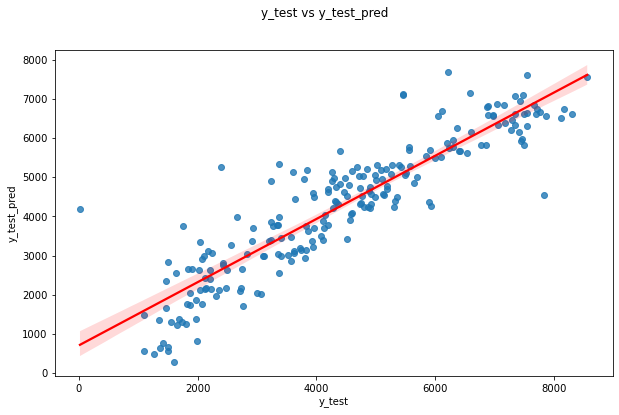

In [77]:
# best fit line on the test dataset
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_test_pred,fit_reg=True,line_kws={"color": "red"})
plt.suptitle('y_test vs y_test_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_test_pred')
plt.show()

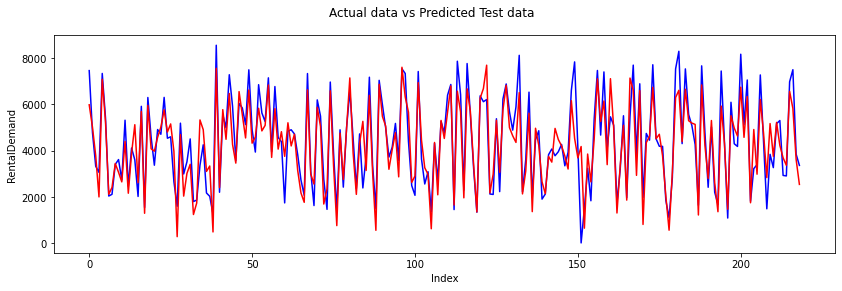

In [78]:
# y_test value VS y_test_predicted value and the pattern is almost similar for the actual and predicted data.
plt.figure(figsize=(14,4))
d = [i for i in range(0,len(X_test),1)]
plt.plot(d,y_test, color='blue')
plt.plot(d,y_test_pred, color='red')
plt.suptitle('Actual data vs Predicted Test data')
plt.xlabel('Index')
plt.ylabel('RentalDemand')
plt.show()

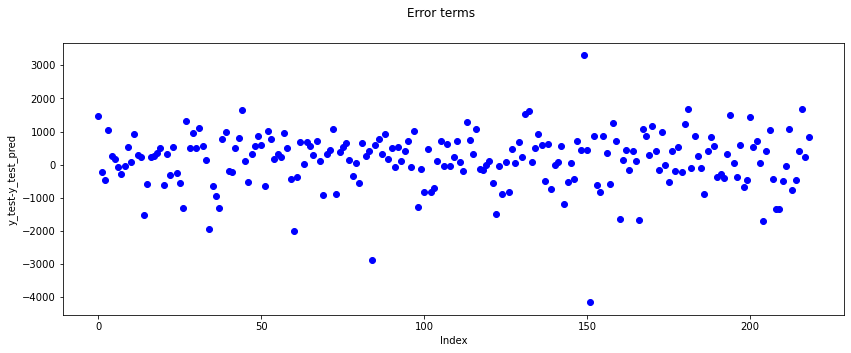

In [79]:
# Plot scatter plot for the residuals and the mean value is zero
plt.figure(figsize=(14,5))
e = [i for i in range(0,len(X_test),1)]
plt.scatter(e,y_test-y_test_pred,color="blue", marker='o')
plt.suptitle('Error terms')
plt.xlabel('Index')
plt.ylabel('y_test-y_test_pred')
plt.show()

In [80]:
# Adjust R square value on test dataset
adjustedr2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjustedr2)

0.78


In [81]:
# View the structure of original dataset
bikes_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thurs,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


In [82]:
# Analyse OLS model
cols=['yr', 'holiday', 'temp', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_oct', 'mnth_sep', 'weathersit_bad', 'weathersit_moderate']
lm = buildmodel(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     225.7
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.28e-178
Time:                        22:53:38   Log-Likelihood:                -4156.4
No. Observations:                 511   AIC:                             8335.
Df Residuals:                     500   BIC:                             8381.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 541.3121    

Note- Significant variables are: holiday, temp, hum, windspeed, Season, Months[August, October, September], year-2019, weathersit i.e Light Snow, Mist+Cloudy

#### Conclusion
- On the basis of 2 years of the dataset due to panademic there is heavy loss in 1st year after recovery from the covid there is hike in the boombikes rentals.
- The R square Adjusted R Square value of final model is 81.9% & 81.5% having very less variation in the accuracy and it indicates the model significance with the help of P values and VIF values for the respective variables.
- August, October and september are best months when the company will be in profit, they can give offers at that time so that sales will be increased rapidly.
- When the weather is bad or moderate the sales are less compared to Spring season.
- The median is less when it is holiday and having high range means more rentals.
- Boom Bikes can come up with new innovative ideas especially on the favourable months mainly October, it is also observed that the panademic conditions also affected the business growth drastically.